In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from dandi import dandiapi
from pynwb import NWBHDF5IO

%matplotlib inline

In [8]:
stim_filepath = f"../../../data/visual_coding/sub-699733573_ses-715093703.nwb"
stim_io = NWBHDF5IO(stim_filepath, mode="r", load_namespaces=True)
stim_file = stim_io.read() 
units = stim_file.units.to_dataframe()
units.head()

C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,snr,quality,presence_ratio,spread,cumulative_drift,isolation_distance,amplitude,firing_rate,nn_hit_rate,isi_violations,...,waveform_duration,local_index,max_drift,velocity_above,cluster_id,peak_channel_id,d_prime,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
950922146,2.276506,good,0.99,40.0,262.59,48.682817,173.55585,3.534362,0.951456,0.040655,...,0.480737,7,24.71,-1.922948,7,850261194,5.529560,"[31.490034958356276, 32.92370245071491, 35.505...","[0.0001615638969686343, 0.0001146743934257875,...","[[0.0, -0.16964999999999364, 0.642329999999995..."
950922020,2.451651,good,0.99,60.0,313.14,30.717576,114.49386,4.218833,0.844371,0.116510,...,0.563149,1,15.30,-0.529792,1,850261194,2.341324,"[27.189465814863283, 27.352032575157004, 27.41...","[0.0001779263088556941, 0.0001903679273326421,...","[[0.0, -0.8997299999999999, -0.872429999999994..."
950921996,2.556012,good,0.99,30.0,299.83,39.067902,102.98964,6.499649,0.904659,0.105187,...,0.535678,0,20.02,0.343384,0,850261194,3.750008,"[26.971165689137713, 27.075865749437607, 27.10...","[0.0001381400932624782, 0.000185573120709172, ...","[[0.0, 2.752229999999992, 0.5171399999999995, ..."
950922084,1.847681,good,0.99,40.0,460.51,21.987697,143.74971,3.715021,0.553741,1.181287,...,0.631826,4,30.47,0.206030,4,850261196,2.192356,"[27.442999294214125, 27.739099464747063, 27.91...","[0.0001200643878712399, 0.00011509520337930783...","[[0.0, 0.5342999999999982, 0.10296000000000127..."
950922063,1.856763,good,0.99,40.0,266.38,47.741669,140.45070,8.389565,0.902000,0.312214,...,0.590620,3,9.71,-0.686767,3,850261196,3.256906,"[27.284332536166527, 27.39949926916116, 27.456...","[0.000126385992005961, 0.00018898987536720963,...","[[0.0, -0.21762000000000725, -1.52996999999998..."


In [5]:
units.shape

(2779, 29)

In [6]:
units.keys()

Index(['snr', 'quality', 'presence_ratio', 'spread', 'cumulative_drift',
       'isolation_distance', 'amplitude', 'firing_rate', 'nn_hit_rate',
       'isi_violations', 'velocity_below', 'l_ratio', 'nn_miss_rate',
       'waveform_halfwidth', 'repolarization_slope', 'amplitude_cutoff',
       'PT_ratio', 'silhouette_score', 'recovery_slope', 'waveform_duration',
       'local_index', 'max_drift', 'velocity_above', 'cluster_id',
       'peak_channel_id', 'd_prime', 'spike_times', 'spike_amplitudes',
       'waveform_mean'],
      dtype='object')

In [17]:
good_units = units[units.quality == 'good']

,snr,quality,presence_ratio,spread,cumulative_drift,isolation_distance,amplitude,firing_rate,nn_hit_rate,isi_violations,...,waveform_duration,local_index,max_drift,velocity_above,cluster_id,peak_channel_id,d_prime,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
950928113,2.371436,good,0.99,170.0,297.67,47.597907,108.005820,1.381475,0.874552,0.266102,...,0.631826,294,36.87,-0.503629,299,850261620,3.793300,"[28.828600092223045, 28.834933429203936, 28.84...","[0.0001509824880329593, 0.00014716441149494627...","[[0.0, -0.6840599999999988, -2.045939999999989..."
950928088,1.357666,good,0.99,170.0,308.21,58.342819,53.791140,5.058218,0.893333,0.438333,...,0.686767,293,22.84,-1.110274,298,850261620,2.581421,"[27.139699119534487, 27.152399126848803, 27.38...","[4.491589846356583e-05, 4.391356571530687e-05,...","[[0.0, 0.45278999999999847, -0.079949999999996..."
950928069,1.519752,good,0.99,150.0,331.29,45.362296,72.451470,1.796764,0.842975,0.799652,...,0.631826,292,27.41,1.339196,297,850261620,3.635216,"[29.019100201937754, 30.695601167484774, 30.92...","[4.6316094089988474e-05, 5.254681291897572e-05...","[[0.0, -1.3786500000000004, -1.921920000000017..."
950928218,1.903546,good,0.99,130.0,337.32,39.855466,116.803440,1.118164,0.840183,0.440033,...,0.563149,299,32.20,-1.259073,304,850261624,2.927787,"[27.09809909557579, 27.244165846366666, 27.693...","[0.0002255927606960226, 0.00025178500479235957...","[[0.0, -0.9859200000000037, -1.317030000000024..."
950928198,4.298745,good,0.95,100.0,73.90,70.343309,231.428340,0.380287,0.918367,0.292638,...,0.604355,298,30.55,-0.726011,303,850261624,5.638828,"[180.5400541340513, 180.57585415466963, 180.59...","[0.0003094966579968398, 0.0003075726169702806,...","[[0.0, 0.00038999999999944635, 1.5639000000000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950932445,2.329216,good,0.99,80.0,200.32,53.645165,102.233040,1.843848,0.903654,0.298754,...,0.357119,513,35.06,0.137353,532,850261814,4.897384,"[74.66255982270394, 75.13426009437022, 75.1678...","[7.348447152269245e-05, 7.925642259631168e-05,...","[[0.0, -0.3346200000000028, 1.2869999999999928..."
950932529,1.834327,good,0.99,90.0,400.79,42.959281,77.478570,2.129176,0.782419,1.073564,...,0.645561,517,29.36,0.892797,536,850261820,3.596363,"[41.333573960877985, 75.10566007789862, 75.514...","[8.081274164383863e-05, 6.549128692916532e-05,...","[[0.0, -0.7019999999999946, -0.141960000000000..."
950933944,4.286030,good,0.70,70.0,0.00,30.079417,194.638093,0.026647,0.055556,0.000000,...,0.631826,596,NaN,1.098827,615,850261832,5.878888,"[193.625795003854, 372.89999825322684, 688.721...","[0.000128973161480754, 0.00012667564295042232,...","[[0.0, 2.2532415254237304, 0.9237711864406801,..."


In [20]:
# sorting units by quality or other attribute (or firing rate?)
# plot spike times for units
# show average waveform across units (possibly in different brain areas?)
# selection of unit
# showing waveform
# for unit, plot firing rate over time or drift
# show unit location

### Showing Spike Times

In [23]:
# We're going to build an array of spike counts surrounding stimulus presentation onset
# To do that, we will need to specify some bins (in seconds, relative to stimulus onset)
time_bin_edges = np.linspace(-0.01, 0.4, 200)

# look at responses to the flash stimulus
flash_250_ms_stimulus_presentation_ids = session.stimulus_presentations[
    session.stimulus_presentations['stimulus_name'] == 'flashes'
].index.values

# and get a set of units with only decent snr
decent_snr_unit_ids = session.units[
    session.units['snr'] >= 1.5
].index.values

spike_counts_da = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=flash_250_ms_stimulus_presentation_ids,
    unit_ids=decent_snr_unit_ids
)
spike_counts_da

NameError: name 'session' is not defined

TypeError: Image data of dtype object cannot be converted to float

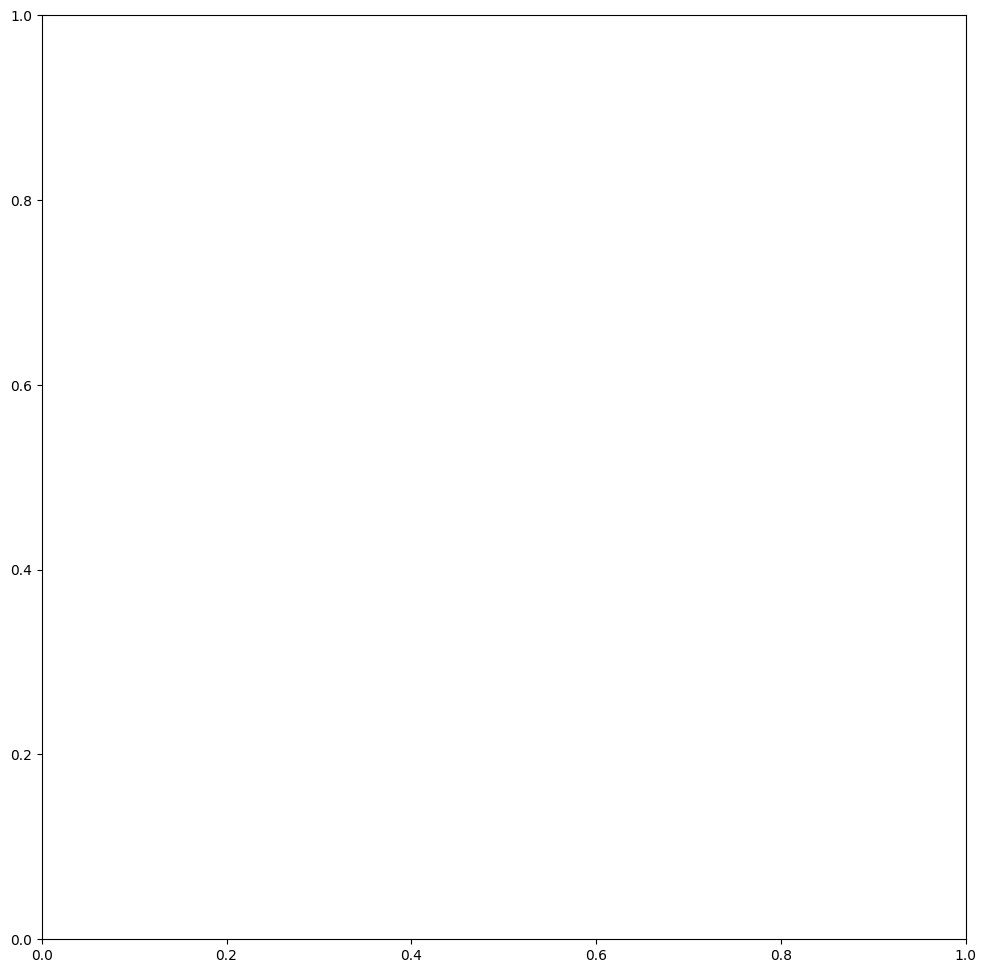

In [22]:
data_array = good_units.spike_times

fig, ax = plt.subplots(figsize=(12, 12))

img = ax.imshow(data_array.T, interpolation='none')
plt.colorbar(img, cax=cbar_axis)

cbar_axis.set_ylabel(cbar_label, fontsize=16)

ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_ylabel(ylabel, fontsize=16)

reltime = np.array(time_coords)
ax.set_xticks(np.arange(0, len(reltime), xtick_step))
ax.set_xticklabels([f'{mp:1.3f}' for mp in reltime[::xtick_step]], rotation=45)
ax.set_xlabel(xlabel, fontsize=16)

ax.set_title(title, fontsize=20)

return fig

### Waveforms

In [ ]:
unit_num = 950913039

In [ ]:
units.waveform_mean[950913039].shape

In [ ]:
waveforms = np.array([waveform for waveform in units.waveform_mean])
waveforms.shape

In [ ]:
avg_waveform = np.average(waveforms,axis=0)
avg_waveform.shape

In [ ]:
fig, ax = plt.subplots()
# for waveform in waveforms:
#     ax.plot(waveform)
ax.plot(avg_waveform)
plt.show()

In [ ]:
waveform = units.waveform_mean[unit_num]
waveform.shape

In [ ]:
unit_avg_waveform = np.average(waveform, axis=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(unit_avg_waveform)
plt.show()